# Свёрточная сеть

## Цели работы:
1. Построить свёрточную нейронную сеть, используя известные библиотеки.
2. Провести эксперименты на различных наборах данных.

## Задание

Постройте свёрточную “нейронную” сеть, состоящую из последовательности преобразований  свёртки и пулинга. Вывод сети должен завершаться SoftArgMax преобразованием. Попробуйте найти наилучшую архитектуру сети. Для поиска параметров используйте один из методов адаптивного градиентного спуска.

В качестве минимизируемой функции ошибки должна использоваться перекрёстная энтропия, а в качестве контрольной функции ошибки - Accuracy (Error Rate). 

Постройте обыкновенную матрицу неточностей, а также матрицу у которой в ячейке i,j находится изображение класса i, которое сеть посчитала наиболее похожим на класс j.

В данной лабораторной разрешается использовать реализации из *Keras*, *Pytorch* и *Tensorflow*, однако вы должны уметь объяснять, как алгоритмически работает тот или иной модуль соответствующей библиотеки.

## Наборы данных
Для поиска наилучшей архитектуры используйте набор данных [MNIST](http://yann.lecun.com/exdb/mnist/). Обучите и протестируйте наилучшую найденную архитектуру сети на наборе данных [Fashion-MNIST](https://github.com/zalandoresearch/fashion-mnist).

# Imports

In [29]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers, Sequential
from sklearn.metrics import confusion_matrix
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

print(tf.__version__)

2.7.0


# Data preparation MNIST

In [19]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

print("Train shape: ", x_train.shape)
print("Test shape: ", x_test.shape)

Train shape:  (60000, 28, 28, 1)
Test shape:  (10000, 28, 28, 1)


In [14]:
batch_size = 128

# Architecture №1

## Initialize model

In [32]:
model = keras.Sequential(
    [
        keras.Input(shape=(28, 28, 1)),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(10, activation="softmax"),
    ]
)

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 5408)              0         
                                                                 
 dense_4 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_________________________________________________________________


## Train model

### SGD optimizer (lr = 0.01)

#### epochs = 5

In [34]:
epochs = 5
sgd_optimizer1 = keras.optimizers.SGD(learning_rate=0.01)
model.compile(loss="categorical_crossentropy", optimizer=sgd_optimizer1, metrics=["accuracy"])
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Epoch 1/5
422/422 [==============================] - 12s 28ms/step - loss: 1.0067 - accuracy: 0.7654 - val_loss: 0.3807 - val_accuracy: 0.9012
Epoch 2/5
422/422 [==============================] - 7s 16ms/step - loss: 0.4087 - accuracy: 0.8841 - val_loss: 0.2980 - val_accuracy: 0.9162
Epoch 3/5
422/422 [==============================] - 8s 19ms/step - loss: 0.3593 - accuracy: 0.8961 - val_loss: 0.2780 - val_accuracy: 0.9212
Epoch 4/5
422/422 [==============================] - 8s 20ms/step - loss: 0.3386 - accuracy: 0.9020 - val_loss: 0.2624 - val_accuracy: 0.9247
Epoch 5/5
422/422 [==============================] - 9s 21ms/step - loss: 0.3255 - accuracy: 0.9062 - val_loss: 0.2551 - val_accuracy: 0.9278
Test loss: 0.29230448603630066
Test accuracy: 0.9172000288963318


#### epochs = 10

In [35]:
epochs = 10
sgd_optimizer1 = keras.optimizers.SGD(learning_rate=0.01)
model.compile(loss="categorical_crossentropy", optimizer=sgd_optimizer1, metrics=["accuracy"])
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Epoch 1/10
422/422 [==============================] - 229s 536ms/step - loss: 0.3158 - accuracy: 0.9089 - val_loss: 0.2505 - val_accuracy: 0.9290
Epoch 2/10
422/422 [==============================] - 9s 22ms/step - loss: 0.3079 - accuracy: 0.9113 - val_loss: 0.2458 - val_accuracy: 0.9317
Epoch 3/10
422/422 [==============================] - 10s 23ms/step - loss: 0.3014 - accuracy: 0.9131 - val_loss: 0.2392 - val_accuracy: 0.9337
Epoch 4/10
422/422 [==============================] - 9s 22ms/step - loss: 0.2958 - accuracy: 0.9146 - val_loss: 0.2358 - val_accuracy: 0.9340
Epoch 5/10
422/422 [==============================] - 10s 25ms/step - loss: 0.2905 - accuracy: 0.9158 - val_loss: 0.2315 - val_accuracy: 0.9348
Epoch 6/10
422/422 [==============================] - 10s 23ms/step - loss: 0.2851 - accuracy: 0.9179 - val_loss: 0.2286 - val_accuracy: 0.9363
Epoch 7/10
422/422 [==============================] - 9s 21ms/step - loss: 0.2801 - accuracy: 0.9192 - val_loss: 0.2251 - val_accuracy: 

### SGD optimizer (lr_schedule)

#### epochs = 5

In [36]:
epochs = 5
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-2,
    decay_steps=10000,
    decay_rate=0.9)

sgd_optimizer2 = keras.optimizers.SGD(learning_rate=lr_schedule)
model.compile(loss="categorical_crossentropy", optimizer=sgd_optimizer2, metrics=["accuracy"])
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Epoch 1/5
422/422 [==============================] - 7s 15ms/step - loss: 0.2614 - accuracy: 0.9246 - val_loss: 0.2103 - val_accuracy: 0.9418
Epoch 2/5
422/422 [==============================] - 6s 15ms/step - loss: 0.2563 - accuracy: 0.9262 - val_loss: 0.2076 - val_accuracy: 0.9427
Epoch 3/5
422/422 [==============================] - 6s 15ms/step - loss: 0.2512 - accuracy: 0.9279 - val_loss: 0.2037 - val_accuracy: 0.9435
Epoch 4/5
422/422 [==============================] - 7s 18ms/step - loss: 0.2462 - accuracy: 0.9288 - val_loss: 0.1991 - val_accuracy: 0.9453
Epoch 5/5
422/422 [==============================] - 8s 18ms/step - loss: 0.2407 - accuracy: 0.9309 - val_loss: 0.1939 - val_accuracy: 0.9478
Test loss: 0.22550256550312042
Test accuracy: 0.9351000189781189


#### epochs = 10

In [37]:
epochs = 10
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-2,
    decay_steps=10000,
    decay_rate=0.9)

sgd_optimizer2 = keras.optimizers.SGD(learning_rate=lr_schedule)
model.compile(loss="categorical_crossentropy", optimizer=sgd_optimizer2, metrics=["accuracy"])
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Epoch 1/10
422/422 [==============================] - 7s 15ms/step - loss: 0.2353 - accuracy: 0.9330 - val_loss: 0.1916 - val_accuracy: 0.9475
Epoch 2/10
422/422 [==============================] - 7s 16ms/step - loss: 0.2301 - accuracy: 0.9346 - val_loss: 0.1863 - val_accuracy: 0.9490
Epoch 3/10
422/422 [==============================] - 8s 19ms/step - loss: 0.2242 - accuracy: 0.9364 - val_loss: 0.1838 - val_accuracy: 0.9510
Epoch 4/10
422/422 [==============================] - 8s 19ms/step - loss: 0.2184 - accuracy: 0.9385 - val_loss: 0.1769 - val_accuracy: 0.9520
Epoch 5/10
422/422 [==============================] - 8s 19ms/step - loss: 0.2125 - accuracy: 0.9403 - val_loss: 0.1737 - val_accuracy: 0.9543
Epoch 6/10
422/422 [==============================] - 7s 17ms/step - loss: 0.2072 - accuracy: 0.9424 - val_loss: 0.1678 - val_accuracy: 0.9570
Epoch 7/10
422/422 [==============================] - 8s 19ms/step - loss: 0.2013 - accuracy: 0.9433 - val_loss: 0.1646 - val_accuracy: 0.9558

### adam optimizer (lr = 0.01)

#### epochs = 5

In [38]:
epochs = 5

adam_optimizer = keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss="categorical_crossentropy", optimizer=adam_optimizer, metrics=["accuracy"])
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Epoch 1/5
422/422 [==============================] - 7s 15ms/step - loss: 0.2133 - accuracy: 0.9477 - val_loss: 0.0743 - val_accuracy: 0.9800
Epoch 2/5
422/422 [==============================] - 6s 15ms/step - loss: 0.0746 - accuracy: 0.9767 - val_loss: 0.0656 - val_accuracy: 0.9808
Epoch 3/5
422/422 [==============================] - 6s 15ms/step - loss: 0.0536 - accuracy: 0.9835 - val_loss: 0.0517 - val_accuracy: 0.9870
Epoch 4/5
422/422 [==============================] - 7s 16ms/step - loss: 0.0429 - accuracy: 0.9859 - val_loss: 0.0774 - val_accuracy: 0.9810
Epoch 5/5
422/422 [==============================] - 8s 18ms/step - loss: 0.0361 - accuracy: 0.9878 - val_loss: 0.0602 - val_accuracy: 0.9840
Test loss: 0.06254531443119049
Test accuracy: 0.9814000129699707


#### epochs = 10

In [39]:
epochs = 10

adam_optimizer = keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss="categorical_crossentropy", optimizer=adam_optimizer, metrics=["accuracy"])
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Epoch 1/10
422/422 [==============================] - 7s 15ms/step - loss: 0.0394 - accuracy: 0.9872 - val_loss: 0.0693 - val_accuracy: 0.9815
Epoch 2/10
422/422 [==============================] - 6s 15ms/step - loss: 0.0279 - accuracy: 0.9907 - val_loss: 0.0689 - val_accuracy: 0.9818
Epoch 3/10
422/422 [==============================] - 7s 17ms/step - loss: 0.0221 - accuracy: 0.9924 - val_loss: 0.0711 - val_accuracy: 0.9835
Epoch 4/10
422/422 [==============================] - 7s 17ms/step - loss: 0.0163 - accuracy: 0.9948 - val_loss: 0.0742 - val_accuracy: 0.9855
Epoch 5/10
422/422 [==============================] - 7s 18ms/step - loss: 0.0150 - accuracy: 0.9948 - val_loss: 0.0783 - val_accuracy: 0.9837
Epoch 6/10
422/422 [==============================] - 8s 19ms/step - loss: 0.0143 - accuracy: 0.9951 - val_loss: 0.0753 - val_accuracy: 0.9862
Epoch 7/10
422/422 [==============================] - 7s 17ms/step - loss: 0.0123 - accuracy: 0.9959 - val_loss: 0.0789 - val_accuracy: 0.9845

# Architecture №2

## Initialize model

In [92]:
model2 = keras.Sequential(
    [
        keras.Input(shape=(28, 28, 1)),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPool2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPool2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(64, activation='relu'),
        layers.BatchNormalization(),
        layers.Dense(10, activation="softmax"),
    ]
)

model2.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_34 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_40 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_35 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_41 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 flatten_30 (Flatten)        (None, 1600)              0         
                                                                 
 dropout_14 (Dropout)        (None, 1600)            

## Train model

#### epochs = 5

In [94]:
epochs = 5
adam_optimizer = keras.optimizers.Adam(learning_rate=0.005)
model2.compile(loss="categorical_crossentropy", optimizer=adam_optimizer, metrics=["accuracy"])
model2.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

score = model2.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Epoch 1/5
422/422 [==============================] - 14s 33ms/step - loss: 0.0374 - accuracy: 0.9882 - val_loss: 0.0262 - val_accuracy: 0.9930
Epoch 2/5
422/422 [==============================] - 14s 33ms/step - loss: 0.0335 - accuracy: 0.9896 - val_loss: 0.0253 - val_accuracy: 0.9922
Epoch 3/5
422/422 [==============================] - 16s 38ms/step - loss: 0.0305 - accuracy: 0.9900 - val_loss: 0.0307 - val_accuracy: 0.9925
Epoch 4/5
422/422 [==============================] - 16s 37ms/step - loss: 0.0281 - accuracy: 0.9910 - val_loss: 0.0302 - val_accuracy: 0.9922
Epoch 5/5
422/422 [==============================] - 16s 37ms/step - loss: 0.0274 - accuracy: 0.9909 - val_loss: 0.0254 - val_accuracy: 0.9932
Test loss: 0.023705579340457916
Test accuracy: 0.9927999973297119


# Fashion-MNIST

## Data preparation

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train_), (x_test, y_test_) = fashion_mnist.load_data()

x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

print("Train shape: ", x_train.shape)
print("Test shape: ", x_test.shape)

Train shape:  (60000, 28, 28, 1)
Test shape:  (10000, 28, 28, 1)


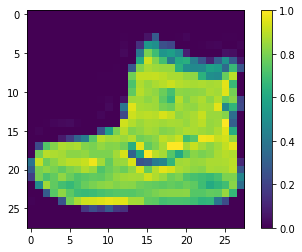

In [3]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

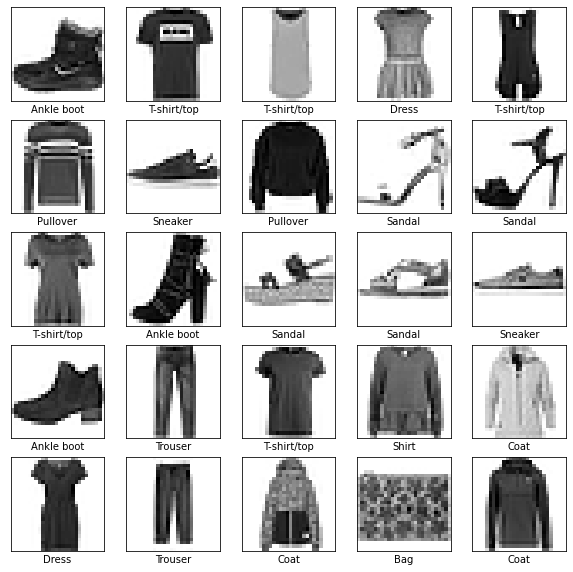

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train_[i]])
plt.show()

In [9]:
y_train = keras.utils.to_categorical(y_train_, 10)
y_test = keras.utils.to_categorical(y_test_, 10)

## Initialize model

In [16]:
model_fashion = Sequential([
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu',input_shape=(28, 28, 1)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(10, activation='softmax')
])

model_fashion.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dropout_1 (Dropout)         (None, 1600)             

## Train model

In [17]:
epochs = 5
adam_optimizer = keras.optimizers.Adam(learning_rate=0.01)
model_fashion.compile(loss="categorical_crossentropy", optimizer=adam_optimizer, metrics=["accuracy"])
model_fashion.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

score = model_fashion.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

2021-12-10 15:21:46.812845: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 169344000 exceeds 10% of free system memory.


Epoch 1/5
422/422 [==============================] - 14s 33ms/step - loss: 0.4995 - accuracy: 0.8142 - val_loss: 0.3444 - val_accuracy: 0.8728
Epoch 2/5
422/422 [==============================] - 16s 37ms/step - loss: 0.3675 - accuracy: 0.8641 - val_loss: 0.3115 - val_accuracy: 0.8823
Epoch 3/5
422/422 [==============================] - 16s 39ms/step - loss: 0.3393 - accuracy: 0.8750 - val_loss: 0.2968 - val_accuracy: 0.8838
Epoch 4/5
422/422 [==============================] - 16s 37ms/step - loss: 0.3087 - accuracy: 0.8859 - val_loss: 0.2946 - val_accuracy: 0.8885
Epoch 5/5
422/422 [==============================] - 16s 37ms/step - loss: 0.2986 - accuracy: 0.8886 - val_loss: 0.2586 - val_accuracy: 0.9060


2021-12-10 15:23:05.056704: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 31360000 exceeds 10% of free system memory.


Test loss: 0.28080689907073975
Test accuracy: 0.8992999792098999


In [34]:
predictions = model_fashion.predict(x_test)
y_pred = np.argmax(predictions, axis=1)

<AxesSubplot:>

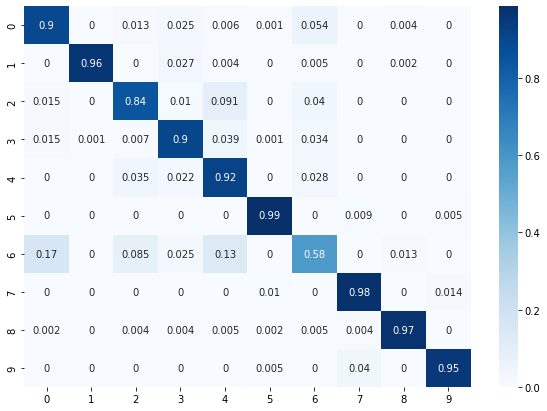

In [25]:
confusion_matrix = confusion_matrix(y_true=y_test_, y_pred=y_pred)
plt.figure(figsize = (10,7))
confusion_matrix = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1)[:, np.newaxis]
sns.heatmap(confusion_matrix, annot=True, cmap='Blues')

In [26]:
print('Most similar clothes:')
print('\t 1. ' + class_names[0] + ' & ' + class_names[6])
print('\t 2. ' + class_names[0] + ' & ' + class_names[4])

Most similar clothes:
	 1. T-shirt/top & Shirt
	 2. T-shirt/top & Coat
